In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)

In [5]:
X.shape

(1000, 2)

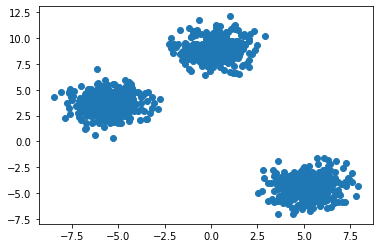

In [10]:
plt.scatter(X[:,0], X[:,1])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42 )

In [13]:
from sklearn.cluster import KMeans

In [14]:
## Manual Process
## Elbow Method to select the K value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)



C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [15]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1140.4677884655125,
 992.6326991429297,
 854.2929980760773,
 754.4952771647168,
 663.0615184015052,
 579.8189517862096,
 533.0517988584472]

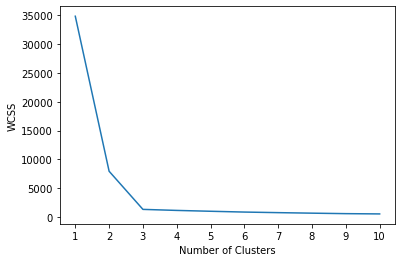

In [16]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [19]:
y_labels = kmeans.fit_predict(X_train)

C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


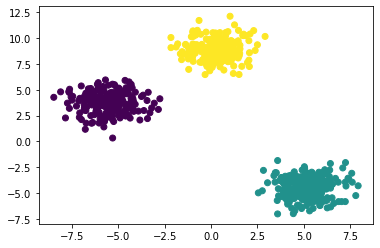

In [21]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

In [27]:
y_test_labels = kmeans.predict(X_test)

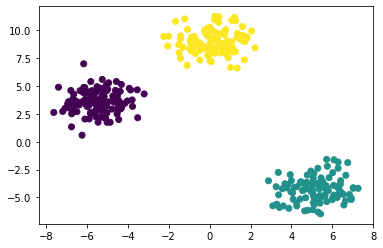

In [28]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_labels)

In [29]:
## knee Locator
!pip install kneed

In [30]:
from kneed import KneeLocator

In [35]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [41]:
## Performance metrics
## Silhoutte score 
from sklearn.metrics import silhouette_score

In [42]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [43]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49134355005793406,
 0.33969336159583724,
 0.34666340665393475,
 0.3375644112359221,
 0.34467408324707144,
 0.3405292974341704]

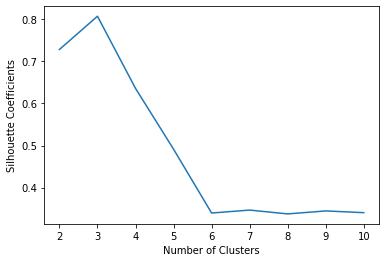

In [44]:
## Plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks (range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()